# GDA for CIFAR-10

- In this problem, you will build classifiers based on Gaussian discriminant analysis. You can use the GDA implementation in sklearn. 


- Run the model learned on the training data, on the set aside test data. What is the accuracy of the model? How does it compare to softmax and OVA models. Place all of your code, including the visualization code,  in the notebook  gda_cifar10.ipynb.

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'


# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


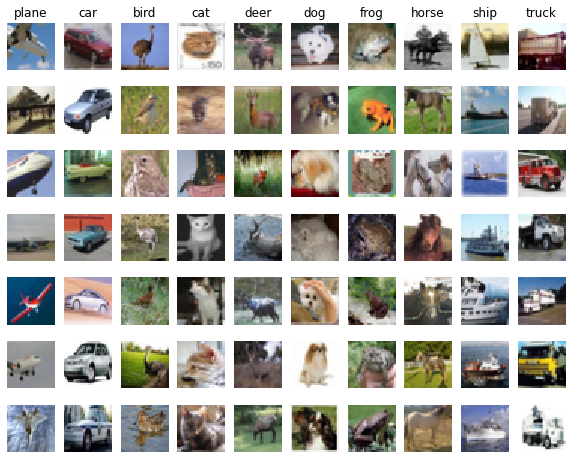

Training data shape: 49000,3072
Validation data shape: 1000,3072
Test data shape: 10000,3072
Training data shape with bias term: 49000,3073
Validation data shape with bias term: 1000,3073
Test data shape with bias term: 10000,3073


In [5]:
import utils

# Get the CIFAR-10 data broken up into train, validation and test sets

X_train, y_train, X_val, y_val, X_test, y_test = utils.get_CIFAR10_data()

# Build GDA model with X_train and y_train

- Taking **pixel values as features, fit a Gaussian distribution to each of the 10 classes using maximum likelihood estimation**. 
    - This involves computing a mean and covariance matrix for each color channel, for each object class. You might want to contrast-normalize each image and each channel by dividing each pixel by the norm of the vector corresponding to the unrolled image. 

In [24]:
# your code here (LDA model with same covariance for every class)
lda_clf = LinearDiscriminantAnalysis(store_covariance=True)
lda_clf.fit(X_train, y_train)

array([6, 1, 9, ..., 2, 9, 8])

In [27]:
## Log some info of the GDA model

print(f"shape of means estimated by GDA {lda_clf.means_.shape}")
print(f"shape of cov matrix estimated by GDA {lda_clf.covariance_.shape}")
print(f"coefficient estimated by GDA: {lda_clf.coef_.shape} \n")

## See the performance of this fitted model
y_train_pred = lda_clf.predict(X_train)
train_acc = np.mean(y_train_pred == y_train)
print(train_acc)

shape of means estimated by GDA (10, 3073)
shape of cov matrix estimated by GDA (3073, 3073)
coefficient estimated by GDA: (10, 3073) 

0.5156122448979592


# Test model on X_test and y_test
- print accuracy of model
- print confusion_matrix

In [28]:
#your code here
from sklearn.metrics import confusion_matrix

y_test_pred = lda_clf.predict(X_test)
test_acc = np.mean(y_test_pred == y_test)
print(f"test accuracy = {test_acc}")
print("Confusion matrix: \n")
confusion_matrix(y_test, y_test_pred)

test accuracy = 0.3708
Confusion matrix: 



array([[462,  44,  48,  47,  22,  45,  19,  49, 191,  73],
       [ 64, 423,  47,  48,  33,  46,  35,  48,  83, 173],
       [ 96,  36, 253, 110, 133,  95, 127,  71,  50,  29],
       [ 44,  49, 116, 246,  64, 219, 126,  51,  31,  54],
       [ 58,  26, 157,  81, 273, 101, 146, 101,  26,  31],
       [ 36,  37, 113, 186,  86, 323,  82,  68,  38,  31],
       [ 14,  37, 104, 143, 113,  86, 415,  45,  16,  27],
       [ 48,  41,  82,  71,  86, 104,  49, 402,  44,  73],
       [171,  84,  25,  38,  13,  51,  11,  22, 487,  98],
       [ 71, 183,  28,  39,  30,  33,  43,  60,  89, 424]])

# Visualize the means for all 10 classes

- Visualize the means of the Gaussians as color images for each category. Also visualize the common covariance matrix computed over all classes. Comment on the visualizations of the means and the covariance matrix learned from the data.

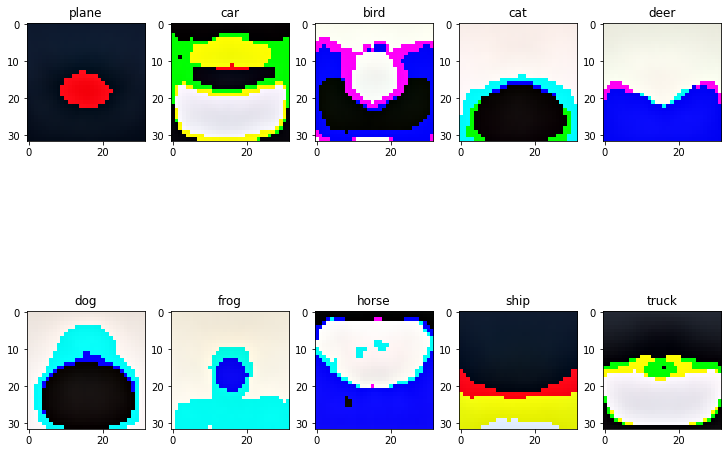

In [56]:
# your code here
classes = ['plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
means = lda_clf.means_[:,1:3073]    # bias term's mean doesn't matter

# reshape the means into the img's size we passed in
# means[i]: for object class i, what does its pixel mean look like
means = means.reshape((10, 32, 32, 3)) 


mosaic = """
    ABCDE
    FGHIJ
"""
fig = plt.figure(constrained_layout=True)
ax_dict = fig.subplot_mosaic(mosaic)

i = 0
for ax in ax_dict:
    ax_dict[ax].imshow(means[i].astype('uint8'))
    ax_dict[ax].set_title(classes[i])
    i+=1

plt.savefig("LDA_means_visuals")

# Visualize the covariance matrix

/var/folders/76/0jylnbrx4p7_yl5fmv0d39yr0000gn/T/ipykernel_60158/776191687.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


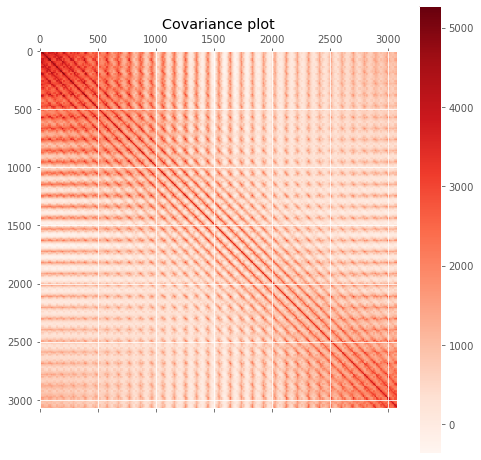

In [67]:
# your code here
# plt.style.use('ggplot')
plt.matshow(lda_clf.covariance_, cmap=plt.cm.Reds)
plt.title("Covariance plot")
cb = plt.colorbar()
